In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
df = pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv", usecols=['statement', 'status'])

In [10]:
df.sample(10)

,statement,status
25024,My name is Logan Leatherwood. I am 19 and I wa...,Suicidal
47484,"No support system I (22,F), lost my mom 4 year...",Depression
34356,Googling made me think I have parasites After ...,Anxiety
32127,so why did you get a ticket?,Normal
44000,laurenbavin hey you didn t tell me you had one...,Normal
37287,I've truly never been happier with my life :))...,Suicidal
9443,I do not know what to do.I cannot check into a...,Depression
9155,And I am too scared to try anymore. I was abus...,Suicidal
22770,I am LIVING IN YOUR WALLSI'M LIVING IN YOUR WA...,Suicidal
13318,i was born in a family of two sisters are came...,Suicidal


In [11]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [12]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='status', ylabel='Count'>

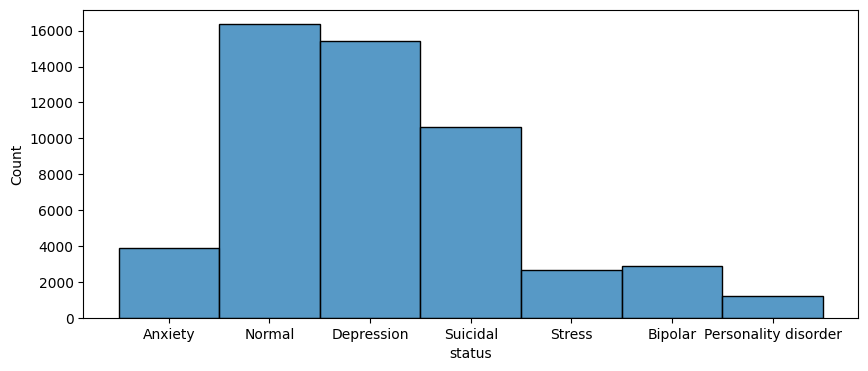

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(df['status'])

In [20]:
# Exploratory Data Analysis

import pandas as pd
from ydata_profiling import ProfileReport
import os

#generate a detailed profile report

profile = ProfileReport(
    df,
    title = "Comprehensive EDA Report - Depression Dataset",
    explorative = True,
    missing_diagrams = {"heatmap" : True, "dendrogram" : True, "matrix" : True, "bar" : True},
    duplicates = {"head" : 10},
    interactions = {"continuous" : True},
    samples = {"head": 5, "tail": 5}
)

#Export the report to the HTML 

output_path = "/kaggle/working/depression_eda_report.html"
profile.to_file(output_path)


print(f"EDA report has been successfully generated and saved to:\n {output_path}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:09<00:00,  4.76s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report has been successfully generated and saved to:
 /kaggle/working/depression_eda_report.html


In [21]:
df.shape

(53043, 2)

(array([ 47.,   0.,   8.,   0.,   1.,   0.,  82.,   0., 100., 124.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

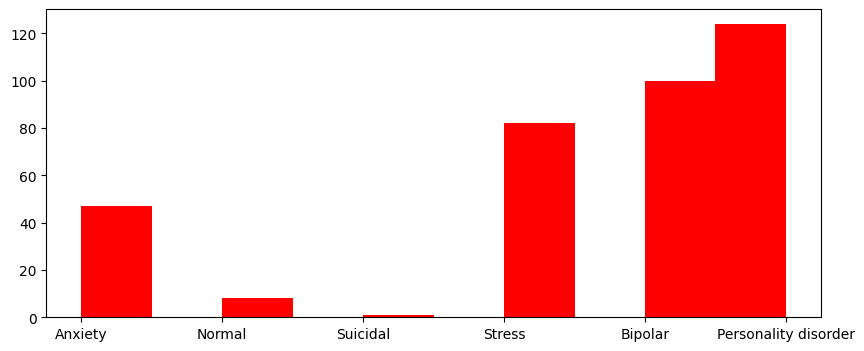

In [43]:
plt.figure(figsize=(10,4))
plt.hist(df[df['statement'].isnull()]['status'], color='red')

In [57]:
df.duplicated().sum()

np.int64(1944)

In [51]:
df_no_null_dup = df.dropna()
df_no_null_dup = df.drop_duplicates()

AttributeError: module 'matplotlib.pyplot' has no attribute 'pallate'

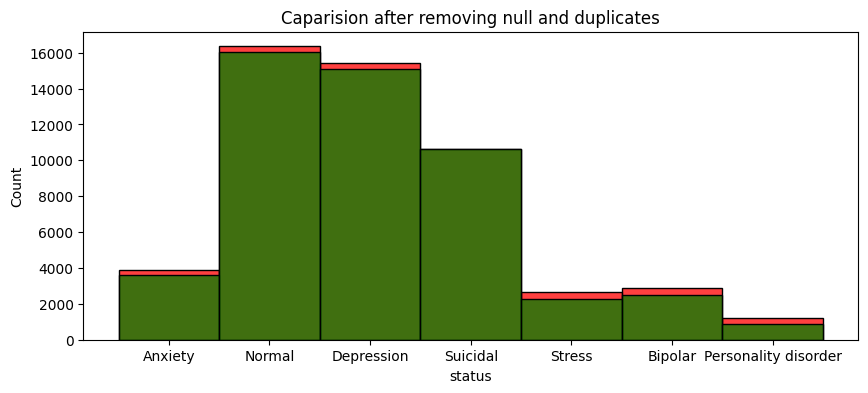

In [55]:
plt.figure(figsize=(10,4))
sns.histplot(df['status'], color='red')

sns.histplot(df_no_null_dup['status'], color='green')
plt.title("Caparision after removing null and duplicates")

In [56]:
df_no_null_dup.shape

(51099, 2)